# Sampling

In this section we introduce some some sampling methods for various problem settings. Suppose we generate a sample $\left\{ x_1, x_2, \ldots, x_n \right\}$ from some distribution $p(x)$.

If the exact functional form of $p(x)$ is unknown or hard to obtain, but we know some function $f(x)$ that is proportional to $p(x)$ up to some normalizing constant, then we can use $f(x)$ to obtain the sample. Some methods include
- Rejection sampling
- Markov Chain Monte Carlo
  - Metropolis Hastings

For multivariate distributions, e.g. $d=2$, if we want to generate a sample $\left\{ (x_1, y_1), \ldots, (x_n, y_n) \right\}$ from unknown $p(x,y)$, and $f(x \vert y )\propto p(x\vert y)$ and $f(y \vert x )\propto p(x\vert y)$ are known, then we can use $f(x \vert y)$ and $f(y \vert x)$ to obtain the sample. Gibbs sampling solve this problem setting.

(estimation-mean-total)=
## Estimation of Mean and Total

Setup
- a population $U = \left\{ 1, \ldots, N_u \right\}$ of $N_u$ units, e.g. people, animals
- a value $y_i$ for each $i \in U$, e.g. height, age
- $\tau = \sum_{i \in U} y_i$ is the total, and $\mu = \frac{\tau}{N_u}$ is the average, of $y$'s in the population
- $S = \left\{ i_1, \ldots, i_n \right\}$ is a sample of $n$ units from $U$, and we can observe $y_i$ for each $i \in S$.

Estimation of population total $\tau$ or average $\mu$ from a random sample is an ubiquitous task.

### Equal Probability Sampling

#### With Replacement

Consider a sample $S$ uniformly from $U$ with replacement, then we have unbiased estimates

$$
\hat{\mu} = \frac{1}{n} \sum_{i \in S}  y_i \quad \hat{\tau} = N_u \bar{y}
$$

with variance

$$
\operatorname{Var}\left( \hat{\mu} \right) = \frac{\sigma^2}{n}  \quad \operatorname{Var}\left( \hat{\tau} \right) =  \frac{N_u^2\sigma^2}{n}
$$

where $\sigma^2$ is the population variance, which can be estimates by $s^2 = \frac{1}{n-1} \sum_{i \in S} (y_i - \bar{y})^2$.

#### Without Replacement

Now consider sampling without replacement. The inclusion probability of unit $i$ in a sample of size $n$ is

$$
\pi_i = \frac{\binom{N_u - 1}{n-1} }{\binom{N_u}{n} } = \frac{n}{N_u}
$$

Similarly, let $\pi_{ij}$ be the probability that units $i$ and $j$ are both in the sample $S$, we have

$$
\pi_{ij} = \frac{n(n-1)}{N_u(N_u - 1) }
$$

The unbiased estimates of the mean and total have the same form

$$
\hat{\tau}_\pi = N_u \bar{y} \quad \hat{\mu}_\pi =  \bar{y}
$$

but smaller variance

$$
\operatorname{Var}\left( \hat{\mu}_\pi \right) = \frac{N_u - n}{N_u } \frac{ \sigma^2 }{n} < \frac{\sigma^2 }{n}   \quad \operatorname{Var}\left( \hat{\tau}_\pi \right) = \frac{N_u (N_u - n) \sigma^2 }{n} < \frac{N_u ^2 \sigma^2 }{n}  
$$



### Unequal Probability Sampling

In many situations, some units are more likely than others to be included in a sample, either by design or by accident, e.g. interviewing people on a street, locating homeless vs homeowners, etc. Sampling under designs of this sort is called **unequal** probability sampling.

In this setting, the sample mean is a biased estimator for $\mu$. The Horvitz-Thompson estimator remedies this problem. Note that the Horvitz-Thompson estimator does not depend on the number of times a unit may be selected. Each distinct unit of the sample is utilized only once. We first consider sampling without replacement such that all units in $S$ is distinct.

#### Horvitz-Thompson Estimate

Suppose that each unit $i \in U$ has probability $\pi_i$ of being included in a sample $S$ of size $n$. The Horvitz-Thompson estimate of $\tau$ and $\mu$ is

$$
\hat{\tau}_\pi = \sum_{i \in S} \frac{y_i}{\pi_i} \quad \hat{\mu}_\pi = \frac{1}{N_u}  \hat{\tau}_\pi
$$

the estimator $\hat{\tau}_\pi$ is unbiased since

$$
\mathbb{E}\left(\hat{\tau}_{\pi}\right)=\mathbb{E}\left(\sum_{i \in S} \frac{y_{i}}{\pi_{i}}  \right)=\mathbb{E}\left(\sum_{i \in {U}}\frac{y_{i}}{\pi_{i}} Z_i\right)=\sum_{i \in {U}} \frac{y_{i}}{\pi_{i}} \mathbb{E}\left(Z_{i}\right) = \tau
$$

where $Z_i = 1$ if $i \in S$ and zero otherwise, hence $\mathbb{E}\left( Z_i \right) = \mathbb{P}\left( Z_i = 1 \right) = \pi_i$.

To find the variance of this estimator, use the indicator variable approach, we obtain

$$\begin{aligned}
\mathbb{V}\left(\hat{\tau}_{\pi}\right)
&= \operatorname{Cov} \left(\sum_{i \in {U}}\frac{y_{i}}{\pi_{i}} Z_i, \sum_{i \in {U}}\frac{y_{i}}{\pi_{i}} Z_i\right) \\
&= \sum_{i\in U}\left(\frac{1-\pi_{i}}{\pi_{i}}\right) y_{i}^{2}+\sum_{i\in U}\sum_{j \neq i}\left(\frac{\pi_{i j}-\pi_{i} \pi_{j}}{\pi_{i} \pi_{j}}\right) y_{i} y_{j} \\
&=\sum_{i \in U} \sum_{j \in U} y_{i} y_{j}\left(\frac{\pi_{i j}}{\pi_{i} \pi_{j}}-1\right) \quad \text{$\pi_{ij} = \pi_i$ when $i = j$.}
\end{aligned}$$

An unbiased estimator for this is

$$\begin{aligned}
\widehat{\mathbb{V}}\left(\hat{\tau}_{\pi}\right)
&= \sum_{i\in S}\left(\frac{1-\pi_{i}}{\pi_{i}^{2}}\right) y_{i}^{2}+\sum_{i\in S} \sum_{j \neq i}\left(\frac{\pi_{i j}-\pi_{i} \pi_{j}}{\pi_{i} \pi_{j}}\right) \frac{1}{\pi_{i j}} y_{i} y_{j} \\
&=\sum_{i \in S} \sum_{j \in S} y_{i} y_{j}\left(\frac{1}{\pi_{i} \pi_{j}}-\frac{1}{\pi_{i j}}\right)
\end{aligned}$$

assuming $\pi_{ij} > 0$ for all pairs $(i, j)$. In particular, if the inclusion of units $i$ and $j$ are independent, then $\pi_{ij} = \pi_i \pi_j$, and only diagonal term $(i=j)$ remains in the above two quantities.

An approximate $(1-\alpha)$ 100% confidence interval for $\tau$ is

$$
\hat{\tau}_{\pi} \pm t_{\alpha / 2} \sqrt{ \hat{\mathbb{V}}\left(\hat{\tau}_{\pi}\right)}
$$

The two analogous quantities for estimator $\hat{\mu}_\pi$ are

$$
\mathbb{V}\left(\hat{\mu}_{\pi}\right)=\frac{1}{N_u^2}  \mathbb{V}\left(\hat{\tau}_{\pi}\right) \quad  \mathbb{V}\left(\hat{\mu}_{\pi}\right)=\frac{1}{N_u^2}  \widehat{\mathbb{V}}\left(\hat{\tau}_{\pi}\right)
$$

#### With Replacement

Now we consider sampling with replacement. We first obtain a sample $S$ of size $n$, then find a set $S^*$ of distinct units from $S$, and use $S^*$ to compute the Horvitz-Thompson estimates.

Let $p_i$ be the probability of being selected in each of the $n$ times for $i \in U$. It is easy to see that the inclusion probability in $S^*$ (or equivalently, sample $S$) are

$$\begin{aligned}
\pi_i
&= 1 - (1-p_i)^n\\
\pi_{ij}
& = \mathbb{P}\left( i \in S \right) + \mathbb{P}\left( j \in S \right) - \mathbb{P}\left( i,j \in S \right) \\
&= \pi_i + \pi_j - [1 - (1-p_i - p_j)^n]
\end{aligned}$$

Horvitz-Thompson estimators can be computed with these values.

If $p_i$ is directly proportional to the values $c_i$ of some characteristic of $i$, i.e., $p_i = \frac{c_i}{\sum c_i}$ we call this **probability proportional to size** (PPS) sampling. For instance, households might be selected for a marketing survey by drawing names from a database, in which case those households with more members in the database have a larger chance of being included.

## Estimation of Group Size and Species

### Group Size

The estimation of group total $\tau$ above usually involve $N_u$, but often $N_u$ is unknown, e.g. populations of endangered animal species. One method to estimate $N_u$ is the class of **capture-recapture** estimators. The simplest version involves two stages
1. Select a simple random sample $S_1$ of size $n_1$ without replacement, mark all units in $S_1$, and return then to the population
2. Select a simple random sample $S_2$ of size $n_2$ without replacement, the value

  $$
  \hat{N}_u^{(c/r)} = \frac{n_2}{m} n_1
  $$

is then used as an estimate of $N_u$, where $m = \left\vert S_1 \cap S_2 \right\vert$ is the number of marked units in $S_2$. An estimator of the variance is

$$
\widehat{V}\left(\hat{N}_{u}^{(c / r)}\right)=\frac{n_{1} n_{2}\left(n_{1}-m\right)\left(n_{2}-m\right)}{m^{3}}
$$

If $n_1$ and $n_2$ are fixed, then $m$ follows a hypergeometric distribution, and the integer part of $\hat{N}_u^{(c/r)}$ corresponds to MLE of $N_u$.

### Group Species

Aka species problem. Suppose there $N_s$ number of species in the forest, how to estimate $N_s$? Similar problems include how many words did Shakespeare know based on his published works, and how many kinds of ancient coins minted by a society based on archaeological finds.

It is possible that there are an arbitrary number of species in the population in arbitrarily small proportions. This fact allows for the species problem to potentially be quite ill-posed.

One nonparametric estimator called coverage estimator of $N_s$ adjusts the number of observed species $n_{obs}$ upward by a certain factor (??)

$$
\hat{N}_s^{cov} = \frac{n_s ^{obs}}{\hat{c}} \quad \text{where} \quad \hat{c} = 1 - \frac{x_1}{n}
$$

where $x_1$ is the number of species observed **only** once in the sample of size $n$. The factor $\hat{c}$ is an estimate of the coverage $c$ of the sample: the fraction of population corresponding to species observed **at least** once.

Pros
- has asymptotic behavior quite close to that of MLE
- easier to compute than MLE

Cons
- suffer from significant bias and large variance in small samples


## Monte Carlo

Given a random variable $X$ with PDF $f$, sometimes we need to compute the expectation of $g(X)$:

$$
\mathbb{E}\left( g(X) \right) = \int g(x)f(x) \mathrm{~d}x
$$

When computationally tractable, closed form expressions are not available for this purpose, and numerical integration is infeasible. For instance, Monte Carlo method generate random draws $x_1, \ldots, x_n$ of $X$ from $f$, and compute the stochastic approximation

$$
\widehat{\mathbb{E}}(g(X))=\frac{1}{n} \sum_{i=1}^{n} g\left(x_{i}\right)
$$

Sometimes it is hard to generate random draws from $f$. If we can sample from $h$ where $w(x) = \frac{f(x)}{h(x)}$, then by re-arrangement we have

$$
\mathbb{E}(g(X))= \frac{\int g(x) w(x) h(x) \mathrm{~d} x }{\int w(x) h(x) \mathrm{~d} x}
$$

Hence the approximation is

$$
\widehat{\mathbb{E}}_{h}(g(X)) = \frac{(1 / n) \sum_{i=1}^{n} w\left(x_{i}\right) g\left(x_{i}\right)}{(1 / n) \sum_{i=1}^{n} w\left(x_{i}\right)}
$$



## Rejection Sampling

## Markov Chain Monte Carlo

### General Setting


### Metropolis Hastings

MH is a particular case of MCMC.

## Gibbs Sampling

## Others

Finite Population Sampling

### Poisson Sampling

### Bernoulli Sampling



## Exercise

### Sampling from a Triangle

Tags: TwoSigma, Quant, 20Q4

*How to generate uniformly distributed points in a triangle in a $xy$-plane, given the coordinates of the three vertices? Suppose that you have a generator that can generate uniformly distributed random values over the interval $[0,1]$ and you can use it twice.*

We can first start from a special case and then generalize it: what if the three coordinates are $(1,0), (0,1), (1,1)$? Call this triangle the basic triangle.

We can draw a random point $(x,y)$ from the square with vertices $(0,0), (0,1), (1,1), (1,0)$, using twice the random generator. If the point is inside the basic triangle, which is identified by $x+y>1$, then we keep it, otherwise we keep its symmetric point $(1-x, 1-y)$ which is inside the basic triangle. The sampling process is implemented in the below python script.

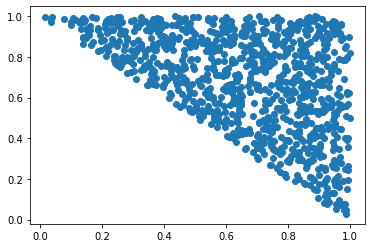

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sample_basic_triangle(n):
    points = np.random.rand(n,2)
    inside = points[:,0] + points[:,1] > 1
    new_points = np.where(np.tile(inside.reshape(n,1), (1,2)), points, 1-points)
    return new_points

points = sample_basic_triangle(1000)
plt.scatter(points[:,0], points[:,1])
plt.show()

Then we can map these uniform random points in the basic triangle to the target triangle, by an affine transformation.

$$
\boldsymbol{y}_i = A \boldsymbol{x}_i + \boldsymbol{b}
$$

where for $i=1,2,3$

- $\boldsymbol{y}_i = (y_{i1}, y_{i2})$ is vertex coordinate of the target triangle
- $\boldsymbol{x}_i = (x_{i1}, y_{i2})$ is vertex coordinate of the basic triangle
- $A=\left[\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right]$ is a matrix
- $\boldsymbol{b}=\left[\begin{array}{c}
b_{1}\\
b_{2}
\end{array}\right]$ is a vector

There are four unknown variables in $A$ and 2 in $\boldsymbol{b}$, and there are six equations, so we are able to solve them. Rearranging the equations gives the standard form of a linear system

$$
\left[\begin{array}{cccccc}
1 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 1\\
1 & 1 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 1 & 0 & 1\\
0 & 0 & 1 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 1
\end{array}\right]\left[\begin{array}{c}
a_{11}\\
a_{12}\\
a_{21}\\
a_{22}\\
b_{1}\\
b_{2}
\end{array}\right]=\left[\begin{array}{c}
y_{11}\\
y_{12}\\
y_{21}\\
y_{22}\\
y_{31}\\
y_{32}
\end{array}\right]
$$

Below is a python script to solve for $A$ and $\boldsymbol{b}$

In [2]:
from numpy.linalg import solve
def solve_affine(y):
    """
    y: shape (3,2), the vertex coordinates of the target triangle
    """

    C = np.array([[1,0,0,0,1,0],
                  [0,1,0,0,0,1],
                  [1,1,0,0,1,0],
                  [0,0,1,1,0,1],
                  [0,0,1,0,1,0],
                  [0,0,0,1,0,1]])
    Ab = solve(C, y.flatten())               
    A = Ab[:4].reshape(2, 2)
    b = Ab[-2:]
    return A, b

y = np.random.rand(3,2)
A, b = solve_affine(y)

Finally we can write the function for the random generator.

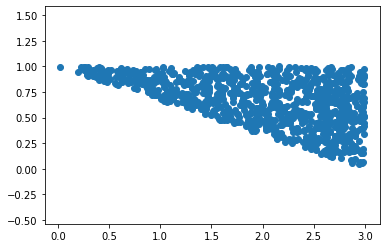

In [3]:
def sample_triangle(n, y):
    """
    sample from a triangle with vertex coordinates (0,1), (1,1), (1,0)
    """
    points = sample_basic_triangle(n)
    A, b = solve_affine(y)
    new_points = A @ points.T + b.reshape(2,1)
    return new_points.T

y = np.array([[3,0], [3,1], [0,1]])
n = 1000
points = sample_triangle(n, y)
plt.scatter(points[:,0], points[:,1])
plt.axis('equal')
plt.show()
